# Градиентный спуск. Практика

## Импорт библиотек, установка константных значений

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
RANDOM_STATE = 123
TRAIN_SIZE = 0.75

np.random.RandomState(RANDOM_STATE);
np.random.seed(RANDOM_STATE);

## Задание 1


Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле:

$$w = (X^TX)^{-1}X^Ty$$

Комментарий: для поиска решения в векторном виде сначала необходимо добавить единичный столбец к матрице $X$.
Это сделано в коде.

In [3]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.linalg.inv(X.T @ X) @ X.T @ y

Заполните функцию для предсказания модели по формуле
$$a(X)=Xw$$

In [4]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ w

Продублируем функцию для вычисления значения MSE из урока

In [5]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)

    return cost

## Задание 2

### Задание 2.1

Скопируйте метод градиентного спуска из семинара в этот ноутбук.


In [6]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

### Задание 2.2 (бонус для отважных)

Если чувствуете в себе силы, попробуйте написать SGD сами.

Модифицируйте метод градиентного спуска из урока так, чтобы это теперь был метод стохастического градиентного спуска:

* на каждой итерации выбирайте один случайный индекс `ind` при помощи библиотеки `numpy.random`

* градиент на каждой итерации градиентного спуска считайте не как сумму градиентов по всем объектам, а только по одному объекту с индексом `ind`

* на каждой итерации вычисляйте значение функции потерь и сохраняйте в список `loss`, который верните вместе с результатом работы функции

In [74]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        rand_index = np.random.choice(np.arange(0, X.shape[0]))
        params = params - 2 * learning_rate * (X[rand_index] * ((X[rand_index] @ params) - y[rand_index]))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Задание 3

- Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код ниже). Для GD и самостоятельно написанного SGD используйте `learning_rate = 0.01, iterations = 10000`.

- С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (`from sklearn.metrics import r2_score`). Для получения предсказания можете использовать функцию `predict` из урока.


In [75]:
np.random.seed(RANDOM_STATE)

X, y, _ = make_regression(n_samples=100000, # число объектов
                          n_features=10, # число признаков
                          n_informative=8, # число информативных признаков
                          noise=100, # уровень шума в данных
                          coef=True, # значение True используется при генерации данных
                          random_state=RANDOM_STATE)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, train_size=TRAIN_SIZE)

In [86]:
# your code for OLS here
weights_ols = ols_solution(X_train, y_train)
y_pred_ols = prediction(X_test, weights_ols)


In [87]:
r2score_ols = r2_score(y_test, y_pred_ols)
r2score_ols

0.7537854744498194

In [88]:
# your code for GD here
track_gd, weights_gd = gradient_descent(X_train, y_train, 0.01, 10000)
y_pred_gd = prediction(X_test, weights_gd)

In [91]:
r2score_gd = r2_score(y_test, y_pred_gd)
r2score_gd

0.7543303294874046

In [93]:
import matplotlib.pyplot as plt

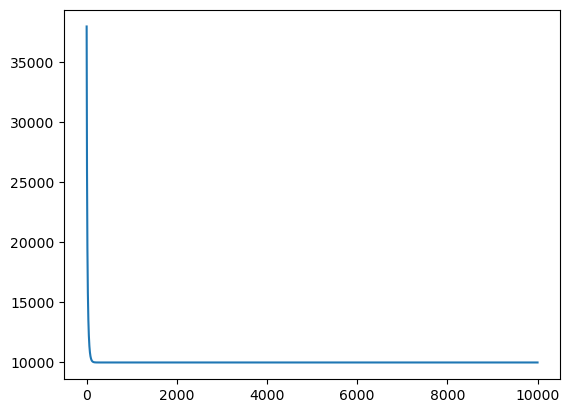

In [94]:
plt.plot(track_gd)

In [95]:
track_sgd, weights_sgd = stochastic_gradient_descent(X_train, y_train, 0.01, 10000)
y_pred_sgd = prediction(X_test, weights_sgd)

In [100]:
r2score_sgd = r2_score(y_test, y_pred_sgd)
r2score_sgd

0.7379421660984977

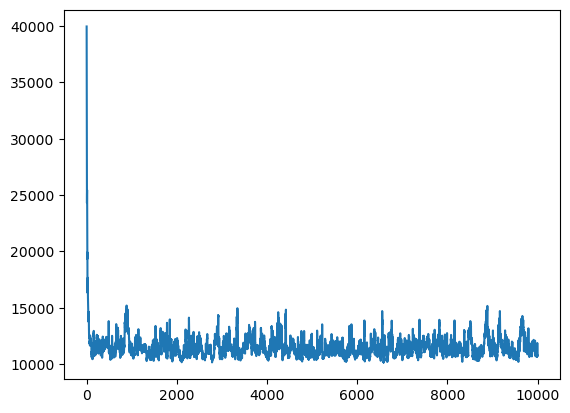

In [99]:
plt.plot(track_sgd)

In [104]:
track_sgd[-1]

array([10726.10805975])

**Вопросы по заданию**

1) все ли методы справились с нахождением минимума?

2) сравните время работы методов (используйте magic command [`%%time`](https://ipython.readthedocs.io/en/stable/interactive/magics.html)): замеряйте время работы соответствующей написанной вами функции. Какой метод сработал быстрее всего?

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации. Какой метод сходится быстрее? Выведите на экран значение r2 для наилучшей из моделей.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [ ]:
# **План**

# 1 - находим веса одним из методов

# 2 - применяем функцию prediction для получения предсказаний с найденными весами

# 3 - вычисляем значение метрики r2

In [109]:
%%time
weights_ols = ols_solution(X_train, y_train)
y_pred_ols = prediction(X_test, weights_ols)

Wall time: 6 ms


In [106]:
%%time
track_sgd, weights_sgd = stochastic_gradient_descent(X_train, y_train, 0.01, 10000)
y_pred_sgd = prediction(X_test, weights_sgd)

Wall time: 2.3 s


In [107]:
%%time
track_gd, weights_gd = gradient_descent(X_train, y_train, 0.01, 10000)
y_pred_gd = prediction(X_test, weights_gd)

Wall time: 3.41 s


## Тестирование моделей на реальных данных

В реальных задачах никто не пишет методы с нуля, если они уже реализованы в python. Самостоятельная реализация методов полезна для получения навыков программирования и более глубокого понимания алгоритмов.

Давайте применим уже готовые методы из `sklearn` для решения задачи регрессии.

In [110]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

Разобъем данные на трейн и тест

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE
    )

Для решения этой задачи попробуйте следующие модели:

* `LinearRegression` из `sklearn`
* `SGDRegressor` из `sklearn`

Обучите модели на тренировочных данных с параметрами по умолчанию и сделайте предсказание на тесте.
Вычислите значение $R^2$.

In [112]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [126]:
# your code here
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [127]:
r2score = r2_score(y_test, y_pred)

In [128]:
r2score

0.6078944086580231

In [130]:
model_SGD = SGDRegressor()
model_SGD.fit(X_train, y_train)
y_pred_SGD = model.predict(X_test)

In [122]:
np.array(y_test)

array([1.516, 0.992, 1.345, ..., 1.096, 0.379, 1.554])

In [131]:
y_pred_SGD

array([2.3874481 , 1.43302789, 2.0358385 , ..., 1.59919224, 1.61828523,
       0.81619723])

In [129]:
y_pred

array([2.3874481 , 1.43302789, 2.0358385 , ..., 1.59919224, 1.61828523,
       0.81619723])

In [132]:
r2score2 = r2_score(y_test, y_pred_SGD)
r2score2

0.6078944086580231